In [382]:
import pandas as pd
from haversine import haversine
import folium

In [383]:
market_2022 = pd.read_csv('./2022년 중형상권 이상.csv', encoding='EUC-KR')
market_2021 = pd.read_csv('./2021년 중형상권 이상.csv', encoding='EUC-KR')
market_2020 = pd.read_csv('./2020년 중형상권 이상.csv', encoding='EUC-KR')
market_2019 = pd.read_csv('./2019년 중형상권 이상.csv', encoding='EUC-KR')

In [384]:
location = pd.read_csv('./metro_2022_10_location.csv', encoding='EUC-KR')
location = location.drop(['사용월',  '출근시간(04~09) 승차', '출근시간(07~10) 하차', '퇴근시간(16~20) 승차', '퇴근시간(17~21) 하차'
                         , '점심시간', '저녁시간', '늦은시간퇴근(20~02) 승차', '총 승차 인원',  '총 하차 인원', '월', '연도'], axis=1)
location.rename(columns={location.columns[0]: "0"}, inplace=True)
location = location.drop(['0'], axis=1)

list_df = pd.DataFrame(location['호선명'].value_counts())
list_df = list_df.reset_index()
list_df_list = list_df['index'].to_list()

sub_list = []
for i in list_df_list:
    sub_list.append(location[location['호선명'].isin([i])])
    
for i in range(22):
    sub_list[i] = sub_list[i].reset_index()
    sub_list[i] = sub_list[i].reset_index()

color_list = [ 'purple' , 'green'  , 'black' , 'gray' , 'Orange',  
              'skyblue' , 'beige'  , 'cadetblue' ,  'blue', 'pink',  
              'yellow'  , 'blue'   ,  'lightgray', 'beige',  'lightblue',  
              'blue'    , 'Orange' , 'blue', 'cadetblue', 'cadetblue' ,
              'darkblue', 'skyblue']

sub_list_sort = []
for i in list_df_list:
    sub_list_sort.append(sub_list[0][sub_list[0]['level_0'].isin([999999])])

for i in range(len(sub_list)):
    su = 0
    su_list = []
    su_list.append(0)
    count = 0

    sel = 1

    while True:
        list_temp = []
        start =  [sub_list[i]['lat'][su], sub_list[i]['lng'][su]]
        for j in range(len(sub_list[i])):
            if not(j in su_list):
                end =  [sub_list[i]['lat'][j], sub_list[i]['lng'][j]]
                a = haversine(start, end, unit = 'km')
                list_temp.append(a)
            else:
                list_temp.append(10)
        

        if min(list_temp) > 3:
            su = 0
            sel = 0
            count = count + 1 
            # 까치산 처럼 갈라지는 곳은 대응못함

        else:
            tmp = min(list_temp)
            index = list_temp.index(tmp)

            if sel == 1:
                sub_list_temp = sub_list[i][sub_list[i]['level_0'].isin([index])]
                sub_list_sort[i] = pd.concat([sub_list_sort[i] , sub_list_temp])

            elif sel == 0:
                sub_list_temp = sub_list[i][sub_list[i]['level_0'].isin([index])]
                sub_list_sort[i] = pd.concat([ sub_list_temp, sub_list_sort[i]])

            su_list.append(index)
            su = index
            
        if count == 2:
            break

        if len(su_list) == len(sub_list[i]):
            break

for i in range(22):
    sub_list_sort[i] = sub_list_sort[i].drop(['level_0', 'index'], axis=1)
    sub_list_sort[i] = sub_list_sort[i].reset_index()
    sub_list_sort[i] = sub_list_sort[i].reset_index()
    


https://m.blog.naver.com/webkim/220695962486
# 매일 10만명의 유동인구 + 일매출10억이상

In [385]:
most_big_market_region_2022 = market_2022.loc[(market_2022['유동인구'] >= 100000)]
most_big_market_region_2022= most_big_market_region_2022.loc[(most_big_market_region_2022['분기당_매출_금액']/91) >= 1000000000]
most_big_market_region_2022["상권규모"] = "특대형상권"
most_big_market_region_2022 = most_big_market_region_2022.reset_index()
most_big_market_region_2022

index                 상권_코드_명  점포_수     분기당_매출_금액  분기당_매출_건수        long  \
0      1  명동 남대문 북창동 다동 무교동 관광특구  8228  414295939101   15035663  126.981856   
1    345                     종각역  2108  129766749443    4925993  126.983496   
2    455           고속터미널(고속터미널역)  1015   99322681540    3617885  127.003981   
3    522         평화시장(통일상가 동화상가)  1958  106968434038    3254288  127.005863   

         lat           유동인구  환승가능한버스노선  500m 버스정류장  환승가능지하철  500m 지하철역   상권규모  
0  37.564149  111583.354839   9.157895          19      1.5          2  특대형상권  
1  37.570339  100588.774194   7.913043          23      1.0          2  특대형상권  
2  37.505008  100292.580645   3.875000          16      3.0          2  특대형상권  
3  37.568772  103006.274194   6.130435          23      2.0          2  특대형상권

In [386]:
big_market_region_2022 = market_2022.loc[(market_2022['유동인구'] < 100000)]
big_market_region_2022=  big_market_region_2022.loc[(big_market_region_2022['분기당_매출_금액']/91) > 1000000000]
big_market_region_2022["상권규모"] = "대형상권"
big_market_region_2022 = big_market_region_2022.reset_index()
big_market_region_2022.head()

index       상권_코드_명   점포_수     분기당_매출_금액  분기당_매출_건수        long        lat  \
0      0      이태원 관광특구   1702  125128808539    4345470  126.994377  37.534435   
1      2  동대문패션타운 관광특구  11708  226971025345    7821510  127.011025  37.567312   
2      3    종로?청계 관광특구   5045  270349786683    7484371  126.997374  37.569998   
3      4   강남 마이스 관광특구    823  179896455786    4350688  127.060059  37.511003   
4    348         종로3가역   3523  310451448682    4570486  126.990921  37.572763   

           유동인구  환승가능한버스노선  500m 버스정류장  환승가능지하철  500m 지하철역  상권규모  
0  25447.209677   1.950000          20      1.0          2  대형상권  
1  77439.258065   5.473684          19      2.5          2  대형상권  
2  59431.758065   5.160000          25      1.5          2  대형상권  
3  81415.306452   6.000000          21      1.0          2  대형상권  
4  67072.822581   8.466667          15      3.0          2  대형상권

In [387]:
middle_market_region_2022 = market_2022.loc[(market_2022['유동인구'] < 100000)]
middle_market_region_2022 = middle_market_region_2022.loc[(middle_market_region_2022['분기당_매출_금액']/91) < 1000000000]
middle_market_region_2022["상권규모"] = "중형상권"
middle_market_region_2022 = middle_market_region_2022.sort_values(by='유동인구', ascending=False)
middle_market_region_2022 = middle_market_region_2022.head(100-len(most_big_market_region_2022)-len(big_market_region_2022)) 
middle_market_region_2022 = middle_market_region_2022.reset_index()
middle_market_region_2022

index                상권_코드_명  점포_수    분기당_매출_금액  분기당_매출_건수        long  \
0      39                서울역 12번   195   9357020133     505611  126.974074   
1     367                  을지로2가   149   6994162758     309445  126.985863   
2     344                   종로구청   576  21091215956    1026447  126.980733   
3     368          중부경찰서(영화인의거리)   448  16628514887     922222  126.990357   
4     450                신림역(신림)  1188  71333735654    4242356  126.929390   
5     645                 서원동상점가   425  31817128231    2295005  126.928329   
6     643                   신원시장   198   7855032826     420797  126.927221   
7     277                 신림역 1번    32   3194384656     225397  126.933438   
8     644           관악종합시장(신원시장)    47   2372053782     193099  126.928047   
9     272                신원동주민센터   141   3999954516     373056  126.927336   
10    343                   광화문역  1695  73445498811    3437251  126.974315   
11    528            에리어식스(벨포스트)   215    917038968       1712  127.011693   
12    347                    인사동  1273  40542479400    1566433  126.985306   
13    527                 제일평화시장   706   9969207540     114877  127.011331   
14    517                   인현시장   132   6977191402     224003  126.995031   
15    221        가산디지털단지역 1번 출입구    69   2431749873      53287  126.883747   
16    638  사당1동먹자골목상점가(사당1동먹자골목)   228  14784849527     484757  126.980339   
17    161               경의중앙 신촌역    72   2231589717     100705  126.940548   
18    639                 강남골목시장    59   5621556168     322624  126.904925   
19    453                사당역(사당)   976  62341945724    2233974  126.982522   
20    523             청계6가 지하도상가   187   3140112756      81537  127.009553   
21    275                 신림역 8번   193  16753613369     331622  126.932837   
22    184                대흥동주민센터    63    939674279      43030  126.941252   
23    265                 KT구로지사    87    804489390      27414  126.902293   
24    435               구로디지털단지역   646  49549407749    2078662  126.901295   
25    263                사당역 10번   419  14116311588     765440  126.978010   
26    178                  홍익지구대    72   1177671300      39449  126.912735   
27    626           영등포로타리지하도상점가    60    284148136      12028  126.906250   
28    590          신촌 상인회(신촌상점가)    49   3096592967     149107  126.937177   
29    360            북창동(시청역_6번)   539  38957267430    1281134  126.977431   
30    122                   강북구청   150   3858679465     182951  127.024247   
31    434                   신도림역  1153  49766550624    2909093  126.890744   
32    530          team204(팀204)   122    938441569      81366  127.013108   
33    599                   영진시장    11    383410736      14289  126.912848   
34    125                 수유역 2번   150   3907519210     190254  127.029083   
35    228                문래동남성맨션    24     43533358        914  126.892525   
36    500                 종로신진시장   316  25945209136     482218  127.005003   
37    359                 시청역_8번   439  71208587837    1878976  126.974206   
38    558                   동서시장    67  36827820536    1604275  127.041412   
39    532                  동평화시장   550  10447707546     447366  127.013232   
40    559               청량리청과물시장   232  83660834746    3643643  127.042669   
41    560                청량리전통시장   203  13573632986     522709  127.043383   
42    354                   동대문역   499  23988842247     830396  127.011806   
43    182                 홍대땡땡거리   292   6415323598     302364  126.931780   
44    623             영등포역지하도상점가   297  17812567563     894919  126.905134   
45    355               동묘앞역(동묘)   279  22842944039    1091903  127.014920   
46    358                 시청역_1번   332  18178730157    1037661  126.974148   
47    506                동대문상가C동   150     55506718        821  127.013312   
48     80           동대문중앙새마을금고본점    40    965686526      17885  127.042602   
49    518             대림상가(청계상가)   207  28740222902     256434  126.995416   
50     15                 

In [388]:
my_map_2022 = folium.Map(location=[37.5502, 126.982], zoom_start=11, title="Stamen Toner")

for each in range(len(list_df_list)):
    for i in range(len(sub_list[each])):
        folium.Marker(
            location = [sub_list[each]['lat'][i], sub_list[each]["lng"][i]],
            popup = sub_list[each]["지하철역"][i],
            icon = folium.Icon(color = color_list[each])
        ).add_to(my_map_2022)

for each in range(len(sub_list_sort)):
    for i in range(len(sub_list_sort[each])):
        if  (i+1) != len(sub_list_sort[each]):
            start =  sub_list_sort[each]['lat'][i], sub_list_sort[each]['lng'][i] 
            end = sub_list_sort[each]['lat'][i+1], sub_list_sort[each]['lng'][i+1]
            
            
            location_data = [start, end]
            folium.PolyLine(locations=location_data, tooltip='Polyline', color=color_list[each]).add_to(my_map_2022)

    
for each in range(len(middle_market_region_2022)):
    marker_circle = folium.Circle([middle_market_region_2022['lat'][each], middle_market_region_2022['long'][each]],
                                       radius = 500,
                                        color = 'white',
                                        popup = middle_market_region_2022['상권_코드_명'][each],
                                        fill_color = 'white'
                                       )
    marker_circle.add_to(my_map_2022)
    
for each in range(len(big_market_region_2022)):
    marker_circle = folium.Circle([big_market_region_2022['lat'][each], big_market_region_2022['long'][each]],
                                       radius = 500,
                                        color = 'orange',
                                        popup = big_market_region_2022['상권_코드_명'][each],
                                        fill_color = 'orange'
                                       )
    marker_circle.add_to(my_map_2022)

for each in range(len(most_big_market_region_2022)):
    marker_circle = folium.Circle([most_big_market_region_2022['lat'][each], most_big_market_region_2022['long'][each]],
                                       radius = 500,
                                        color = 'red',
                                        popup = most_big_market_region_2022['상권_코드_명'][each],
                                        fill_color = 'red'
                                       )
    marker_circle.add_to(my_map_2022)
    


C:\Users\김두엽\AppData\Local\Temp\ipykernel_13868\2884120462.py:8: UserWarning: color argument of Icon should be one of: {'blue', 'green', 'lightgreen', 'darkred', 'darkblue', 'darkgreen', 'lightblue', 'lightred', 'orange', 'white', 'darkpurple', 'gray', 'beige', 'black', 'cadetblue', 'pink', 'lightgray', 'red', 'purple'}.
  icon = folium.Icon(color = color_list[each])


In [389]:
my_map_2022

# 너무 보기 어려워서 지하철 역은 표기하지 않겠다.

In [390]:
my_map_2022 = folium.Map(location=[37.5502, 126.982], zoom_start=11, title="Stamen Toner")


for each in range(len(sub_list_sort)):
    for i in range(len(sub_list_sort[each])):
        if  (i+1) != len(sub_list_sort[each]):
            start =  sub_list_sort[each]['lat'][i], sub_list_sort[each]['lng'][i] 
            end = sub_list_sort[each]['lat'][i+1], sub_list_sort[each]['lng'][i+1]
            
            
            location_data = [start, end]
            folium.PolyLine(locations=location_data, tooltip='Polyline', color=color_list[each]).add_to(my_map_2022)

    
for each in range(len(middle_market_region_2022)):
    marker_circle = folium.Circle([middle_market_region_2022['lat'][each], middle_market_region_2022['long'][each]],
                                       radius = 500,
                                        color = 'white',
                                        popup = middle_market_region_2022['상권_코드_명'][each],
                                        fill_color = 'white'
                                       )
    marker_circle.add_to(my_map_2022)
    
for each in range(len(big_market_region_2022)):
    marker_circle = folium.Circle([big_market_region_2022['lat'][each], big_market_region_2022['long'][each]],
                                       radius = 500,
                                        color = 'orange',
                                        popup = big_market_region_2022['상권_코드_명'][each],
                                        fill_color = 'orange'
                                       )
    marker_circle.add_to(my_map_2022)

for each in range(len(most_big_market_region_2022)):
    marker_circle = folium.Circle([most_big_market_region_2022['lat'][each], most_big_market_region_2022['long'][each]],
                                       radius = 500,
                                        color = 'red',
                                        popup = most_big_market_region_2022['상권_코드_명'][each],
                                        fill_color = 'red'
                                       )
    marker_circle.add_to(my_map_2022)
    


In [391]:
most_big_market_region_2021 = market_2021.loc[(market_2021['유동인구'] >= 100000)]
most_big_market_region_2021= most_big_market_region_2021.loc[(most_big_market_region_2021['분기당_매출_금액']/91) >= 1000000000]
most_big_market_region_2021["상권규모"] = "특대형상권"
most_big_market_region_2021 = most_big_market_region_2021.reset_index()

big_market_region_2021 = market_2021.loc[(market_2021['유동인구'] < 100000)]
big_market_region_2021=  big_market_region_2021.loc[(big_market_region_2021['분기당_매출_금액']/91) > 1000000000]
big_market_region_2021["상권규모"] = "대형상권"
big_market_region_2021 = big_market_region_2021.reset_index()

middle_market_region_2021 = market_2021.loc[(market_2021['유동인구'] < 100000)]
middle_market_region_2021 = middle_market_region_2021.loc[(middle_market_region_2021['분기당_매출_금액']/91) < 1000000000]
middle_market_region_2021["상권규모"] = "중형상권"
middle_market_region_2021 = middle_market_region_2021.sort_values(by='유동인구', ascending=False)
middle_market_region_2021 = middle_market_region_2021.head(100-len(most_big_market_region_2021)-len(big_market_region_2021)) 
middle_market_region_2021 = middle_market_region_2021.reset_index()


my_map_2021 = folium.Map(location=[37.5502, 126.982], zoom_start=11, title="Stamen Toner")



for each in range(len(sub_list_sort)):
    for i in range(len(sub_list_sort[each])):
        if  (i+1) != len(sub_list_sort[each]):
            start =  sub_list_sort[each]['lat'][i], sub_list_sort[each]['lng'][i] 
            end = sub_list_sort[each]['lat'][i+1], sub_list_sort[each]['lng'][i+1]
            
            
            location_data = [start, end]
            folium.PolyLine(locations=location_data, tooltip='Polyline', color=color_list[each]).add_to(my_map_2021)

    
for each in range(len(middle_market_region_2021)):
    marker_circle = folium.Circle([middle_market_region_2021['lat'][each], middle_market_region_2021['long'][each]],
                                       radius = 500,
                                        color = 'white',
                                        popup = middle_market_region_2021['상권_코드_명'][each],
                                        fill_color = 'white'
                                       )
    marker_circle.add_to(my_map_2021)
    
for each in range(len(big_market_region_2021)):
    marker_circle = folium.Circle([big_market_region_2021['lat'][each], big_market_region_2021['long'][each]],
                                       radius = 500,
                                        color = 'orange',
                                        popup = big_market_region_2021['상권_코드_명'][each],
                                        fill_color = 'orange'
                                       )
    marker_circle.add_to(my_map_2021)

for each in range(len(most_big_market_region_2021)):
    marker_circle = folium.Circle([most_big_market_region_2021['lat'][each], most_big_market_region_2021['long'][each]],
                                       radius = 500,
                                        color = 'red',
                                        popup = most_big_market_region_2021['상권_코드_명'][each],
                                        fill_color = 'red'
                                       )
    marker_circle.add_to(my_map_2021)



In [392]:
most_big_market_region_2020 = market_2020.loc[(market_2020['유동인구'] >= 100000)]
most_big_market_region_2020= most_big_market_region_2020.loc[(most_big_market_region_2020['분기당_매출_금액']/91) >= 1000000000]
most_big_market_region_2020["상권규모"] = "특대형상권"
most_big_market_region_2020 = most_big_market_region_2020.reset_index()

big_market_region_2020 = market_2020.loc[(market_2020['유동인구'] < 100000)]
big_market_region_2020=  big_market_region_2020.loc[(big_market_region_2020['분기당_매출_금액']/91) > 1000000000]
big_market_region_2020["상권규모"] = "대형상권"
big_market_region_2020 = big_market_region_2020.reset_index()

middle_market_region_2020 = market_2020.loc[(market_2020['유동인구'] < 100000)]
middle_market_region_2020 = middle_market_region_2020.loc[(middle_market_region_2020['분기당_매출_금액']/91) < 1000000000]
middle_market_region_2020["상권규모"] = "중형상권"
middle_market_region_2020 = middle_market_region_2020.sort_values(by='유동인구', ascending=False)
middle_market_region_2020 = middle_market_region_2020.head(100-len(most_big_market_region_2020)-len(big_market_region_2020)) 
middle_market_region_2020 = middle_market_region_2020.reset_index()


my_map_2020 = folium.Map(location=[37.5502, 126.982], zoom_start=11, title="Stamen Toner")


for each in range(len(sub_list_sort)):
    for i in range(len(sub_list_sort[each])):
        if  (i+1) != len(sub_list_sort[each]):
            start =  sub_list_sort[each]['lat'][i], sub_list_sort[each]['lng'][i] 
            end = sub_list_sort[each]['lat'][i+1], sub_list_sort[each]['lng'][i+1]
            
            
            location_data = [start, end]
            folium.PolyLine(locations=location_data, tooltip='Polyline', color=color_list[each]).add_to(my_map_2020)

    
for each in range(len(middle_market_region_2020)):
    marker_circle = folium.Circle([middle_market_region_2020['lat'][each], middle_market_region_2020['long'][each]],
                                       radius = 500,
                                        color = 'white',
                                        popup = middle_market_region_2021['상권_코드_명'][each],
                                        fill_color = 'white'
                                       )
    marker_circle.add_to(my_map_2020)
    
for each in range(len(big_market_region_2020)):
    marker_circle = folium.Circle([big_market_region_2020['lat'][each], big_market_region_2020['long'][each]],
                                       radius = 500,
                                        color = 'orange',
                                        popup = big_market_region_2020['상권_코드_명'][each],
                                        fill_color = 'orange'
                                       )
    marker_circle.add_to(my_map_2020)

for each in range(len(most_big_market_region_2020)):
    marker_circle = folium.Circle([most_big_market_region_2020['lat'][each], most_big_market_region_2020['long'][each]],
                                       radius = 500,
                                        color = 'red',
                                        popup = most_big_market_region_2020['상권_코드_명'][each],
                                        fill_color = 'red'
                                       )
    marker_circle.add_to(my_map_2020)



In [393]:
most_big_market_region_2019 = market_2019.loc[(market_2019['유동인구'] >= 100000)]
most_big_market_region_2019= most_big_market_region_2019.loc[(most_big_market_region_2019['분기당_매출_금액']/91) >= 1000000000]
most_big_market_region_2019["상권규모"] = "특대형상권"
most_big_market_region_2019 = most_big_market_region_2019.reset_index()

big_market_region_2019 = market_2019.loc[(market_2019['유동인구'] < 100000)]
big_market_region_2019=  big_market_region_2019.loc[(big_market_region_2019['분기당_매출_금액']/91) > 1000000000]
big_market_region_2019["상권규모"] = "대형상권"
big_market_region_2019 = big_market_region_2019.reset_index()

middle_market_region_2019 = market_2019.loc[(market_2019['유동인구'] < 100000)]
middle_market_region_2019 = middle_market_region_2019.loc[(middle_market_region_2019['분기당_매출_금액']/91) < 1000000000]
middle_market_region_2019["상권규모"] = "중형상권"
middle_market_region_2019 = middle_market_region_2019.sort_values(by='유동인구', ascending=False)
middle_market_region_2019 = middle_market_region_2019.head(100-len(most_big_market_region_2019)-len(big_market_region_2019)) 
middle_market_region_2019 = middle_market_region_2019.reset_index()


my_map_2019 = folium.Map(location=[37.5502, 126.982], zoom_start=11, title="Stamen Toner")


for each in range(len(sub_list_sort)):
    for i in range(len(sub_list_sort[each])):
        if  (i+1) != len(sub_list_sort[each]):
            start =  sub_list_sort[each]['lat'][i], sub_list_sort[each]['lng'][i] 
            end = sub_list_sort[each]['lat'][i+1], sub_list_sort[each]['lng'][i+1]
            
            
            location_data = [start, end]
            folium.PolyLine(locations=location_data, tooltip='Polyline', color=color_list[each]).add_to(my_map_2019)
    
for each in range(len(middle_market_region_2019)):
    marker_circle = folium.Circle([middle_market_region_2019['lat'][each], middle_market_region_2019['long'][each]],
                                       radius = 500,
                                        color = 'white',
                                        popup = middle_market_region_2019['상권_코드_명'][each],
                                        fill_color = 'white'
                                       )
    marker_circle.add_to(my_map_2019)
    
for each in range(len(big_market_region_2019)):
    marker_circle = folium.Circle([big_market_region_2019['lat'][each], big_market_region_2019['long'][each]],
                                       radius = 500,
                                        color = 'orange',
                                        popup = big_market_region_2019['상권_코드_명'][each],
                                        fill_color = 'orange'
                                       )
    marker_circle.add_to(my_map_2019)

for each in range(len(most_big_market_region_2019)):
    marker_circle = folium.Circle([most_big_market_region_2019['lat'][each], most_big_market_region_2019['long'][each]],
                                       radius = 500,
                                        color = 'red',
                                        popup = most_big_market_region_2019['상권_코드_명'][each],
                                        fill_color = 'red'
                                       )
    marker_circle.add_to(my_map_2019)
    


# 2022년 10월 상위 100위 상권 
- 빨강 : 초대형상권  매일 10만명의 유동인구 + 일매출10억이상
- 주황 : 대형상권 매일 2만명이상의 유동인구 + 일매출 10억이상
- 흰색 : 중형상권 매일 2만명이상의 유동인구를 유동인구 순으로 정렬한 나머지

In [394]:
my_map_2022

# 2021년 10월 상위 100위 상권 
- 빨강 : 초대형상권  매일 10만명의 유동인구 + 일매출10억이상
- 주황 : 대형상권 매일 2만명이상의 유동인구 + 일매출 10억이상
- 흰색 : 중형상권 매일 2만명이상의 유동인구를 유동인구 순으로 정렬한 나머지

In [395]:
my_map_2021

# 2020년 10월 상위 100위 상권 
- 빨강 : 초대형상권  매일 10만명의 유동인구 + 일매출10억이상
- 주황 : 대형상권 매일 2만명이상의 유동인구 + 일매출 10억이상
- 흰색 : 중형상권 매일 2만명이상의 유동인구를 유동인구 순으로 정렬한 나머지

In [396]:
my_map_2020

# 2019년 10월 상위 100위 상권 
- 빨강 : 초대형상권  매일 10만명의 유동인구 + 일매출10억이상
- 주황 : 대형상권 매일 2만명이상의 유동인구 + 일매출 10억이상
- 흰색 : 중형상권 매일 2만명이상의 유동인구를 유동인구 순으로 정렬한 나머지

In [397]:
my_map_2019

# 2019~2022년까지 10월의 특대형 상권의 변화는?

In [398]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [399]:
middle_market_region_2022_visual = market_2022.loc[(market_2022['유동인구'] < 100000)]
middle_market_region_2022_visual = middle_market_region_2022_visual.loc[(middle_market_region_2022_visual['분기당_매출_금액']/91) < 1000000000]
middle_market_region_2021_visual = market_2021.loc[(market_2021['유동인구'] < 100000)]
middle_market_region_2021_visual = middle_market_region_2021_visual.loc[(middle_market_region_2021_visual['분기당_매출_금액']/91) < 1000000000]
middle_market_region_2020_visual = market_2020.loc[(market_2020['유동인구'] < 100000)]
middle_market_region_2020_visual = middle_market_region_2020_visual.loc[(middle_market_region_2020_visual['분기당_매출_금액']/91) < 1000000000]
middle_market_region_2019_visual = market_2019.loc[(market_2019['유동인구'] < 100000)]
middle_market_region_2019_visual = middle_market_region_2019_visual.loc[(middle_market_region_2019_visual['분기당_매출_금액']/91) < 1000000000]

In [400]:
market_count = pd.DataFrame({'초대형상권' : [len(most_big_market_region_2019), len(most_big_market_region_2020),
                                            len(most_big_market_region_2021), len(most_big_market_region_2022)],
                             '대형상권' : [len(big_market_region_2019), len(big_market_region_2020),
                                          len(big_market_region_2021), len(big_market_region_2022),],
                             '중형상권' : [len(middle_market_region_2019_visual), len(middle_market_region_2020_visual),
                                          len(middle_market_region_2021_visual), len(middle_market_region_2022_visual),]
                            }, index = ["2019년", "2020년", "2021년", "2022년"])
market_count = market_count.reset_index() 
market_count['중형상권이상의 수'] = market_count['초대형상권'] +market_count['대형상권'] + market_count['중형상권']  

In [401]:
# matplotlib의 경우 한글폰트 깨짐현상을 방지하기 위한 코드
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

f_path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

import seaborn as sns

<AxesSubplot:xlabel='index'>

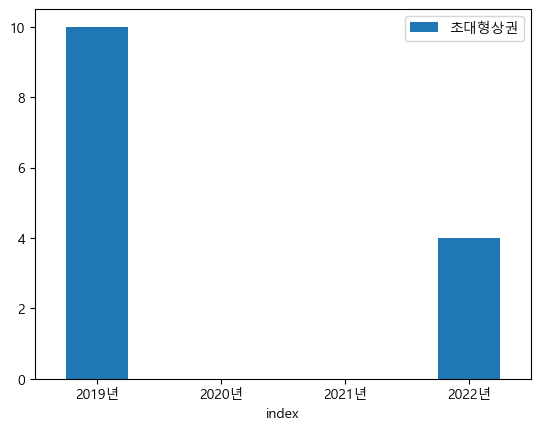

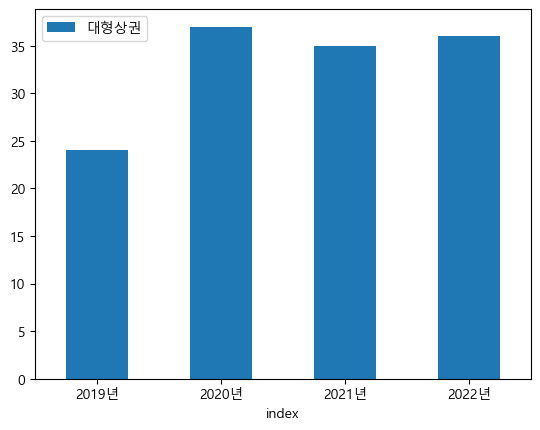

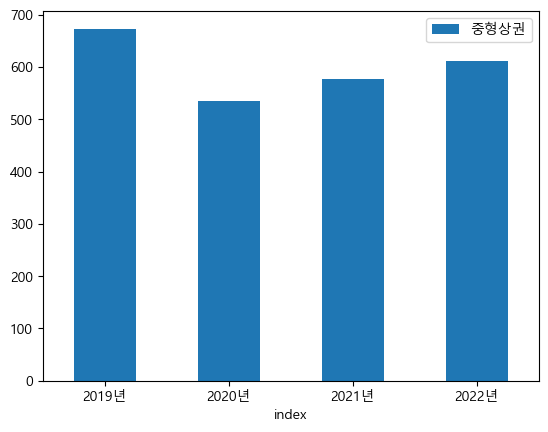

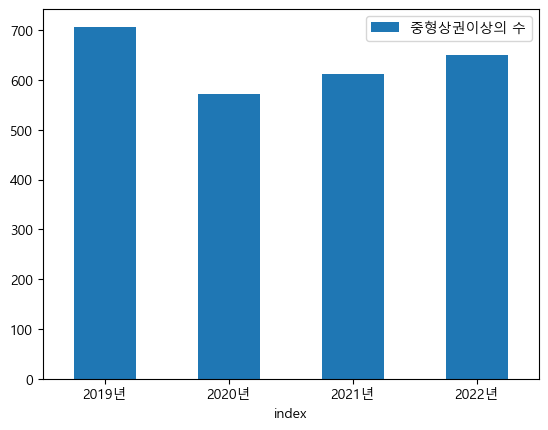

In [402]:
market_count.plot.bar(x='index',y='초대형상권',rot=0)
market_count.plot.bar(x='index',y='대형상권',rot=0)
market_count.plot.bar(x='index',y='중형상권',rot=0)
market_count.plot.bar(x='index',y='중형상권이상의 수',rot=0)

# 몇가지 확인해보고 싶은 것
## 2019년의 초대형 상권들이 전부 대형상권이 되버린 것일까?
## 2022년의 초대형 상권 중에서 2019년에 초대형 상권이였던 곳이 있나?

</br>
</br>
</br>


## 2019년의 초대형 상권들이 전부 대형상권이 되버린 것일까?

In [403]:
most_big_market_region_2019.head()

index                 상권_코드_명   점포_수     분기당_매출_금액  분기당_매출_건수        long  \
0      1  명동 남대문 북창동 다동 무교동 관광특구   8631  392306973005   16655824  126.981856   
1      2            동대문패션타운 관광특구  13270  204760984791    6077340  127.011025   
2      4             강남 마이스 관광특구    851  173926103805    4768635  127.060059   
3    402                     종각역   1834  133283055803    5696212  126.983496   
4    423                명동(명동거리)   2218  164980548089    8307033  126.984256   

         lat           유동인구  환승가능한버스노선  500m 버스정류장  환승가능지하철  500m 지하철역   상권규모  
0  37.564149  138946.870968   9.555556          18      1.5          1  특대형상권  
1  37.567312  107866.096774   5.473684          19      2.5          1  특대형상권  
2  37.511003  101897.145161   5.818182          22      1.0          1  특대형상권  
3  37.570339  128279.516129   7.913043          23      1.0          1  특대형상권  
4  37.563230  124712.451613   8.500000          16      1.0          1  특대형상권

In [404]:
big_market_region_2020.head()

index                 상권_코드_명   점포_수     분기당_매출_금액  분기당_매출_건수        long  \
0      0  명동 남대문 북창동 다동 무교동 관광특구   8830  376621394364   14118041  126.981856   
1      1            동대문패션타운 관광특구  13382  246639327198    8631823  127.011025   
2      2              종로?청계 관광특구   5285  259239790301    7588063  126.997374   
3      3             강남 마이스 관광특구    889  167195866008    3957523  127.060059   
4    283                     종각역   2210  122895242318    5386880  126.983496   

         lat          유동인구  환승가능한버스노선  500m 버스정류장  환승가능지하철  500m 지하철역  상권규모  
0  37.564149  86138.322581  11.157895          19      1.5          1  대형상권  
1  37.567312  66338.096774   6.000000          19      2.5          1  대형상권  
2  37.569998  49171.016129   5.560000          25      1.5          1  대형상권  
3  37.511003  68574.983871   5.818182          22      1.0          1  대형상권  
4  37.570339  81576.612903   7.680000          25      1.0          1  대형상권

# 간단하게 확인해보자 folium 좌표로 찍어보고 2019년의 특대형 상권이 보인다면 성공이다.

In [405]:
my_map_test = folium.Map(location=[37.5502, 126.982], zoom_start=11, title="Stamen Toner")


for each in range(len(most_big_market_region_2019)):
    marker_circle = folium.Circle([most_big_market_region_2019['lat'][each], most_big_market_region_2019['long'][each]],
                                       radius = 500,
                                        color = 'red',
                                        popup = most_big_market_region_2019['상권_코드_명'][each],
                                        fill_color = 'red'
                                       )
    marker_circle.add_to(my_map_test)
    
for each in range(len(big_market_region_2020)):
    marker_circle = folium.Circle([big_market_region_2020['lat'][each], big_market_region_2020['long'][each]],
                                       radius = 500,
                                        color = 'orange',
                                        popup = big_market_region_2020['상권_코드_명'][each],
                                        fill_color = 'orange'
                                       )
    marker_circle.add_to(my_map_test)


my_map_test

### 고속터미널의 경우 2019년에 초대형상권에서 2020년에 중형상권으로 추락했다.


## 2022년의 초대형 상권 중에서 2019년에 초대형 상권이였던 곳이 있나?

In [406]:
my_map_test = folium.Map(location=[37.5502, 126.982], zoom_start=12, title="Stamen Toner")


for each in range(len(most_big_market_region_2019)):
    marker_circle = folium.Circle([most_big_market_region_2019['lat'][each], most_big_market_region_2019['long'][each]],
                                       radius = 500,
                                        color = 'orange',
                                        popup = most_big_market_region_2019['상권_코드_명'][each],
                                        fill_color = 'orange'
                                       )
    marker_circle.add_to(my_map_test)
    
    
for each in range(len(most_big_market_region_2022)):
    marker_circle = folium.Circle([most_big_market_region_2022['lat'][each], most_big_market_region_2022['long'][each]],
                                       radius = 500,
                                        color = 'red',
                                        popup = most_big_market_region_2022['상권_코드_명'][each],
                                        fill_color = 'red'
                                       )
    marker_circle.add_to(my_map_test)

my_map_test

### 2022년 특대형 상권은 2019년의 특대형 상권과 일치했으며 새롭게 생긴 곳은 없다

# 그러면 2019년~2022년 10월의 중형상권 이상의 유동인구는 어떻게 변화하였는가?
- 무식하게 모든 연도별 모든 유동인구를 더해보자.

In [407]:
market_count = pd.DataFrame({'유동인구' : [market_2019["유동인구"].sum(), market_2020["유동인구"].sum(), market_2021["유동인구"].sum(),
                                           market_2022["유동인구"].sum()],
                             '중형상권의 수' : [len(market_2019["유동인구"]), len(market_2020["유동인구"]), len(market_2021["유동인구"]),
                                           len(market_2022["유동인구"])],
                             
                            }, index = ["2019년", "2020년", "2021년", "2022년"])
market_count = market_count.reset_index() 
market_count['중형상권 1곳당 유동 인구'] = market_count["유동인구"] / market_count["중형상권의 수"] 

<AxesSubplot:xlabel='index'>

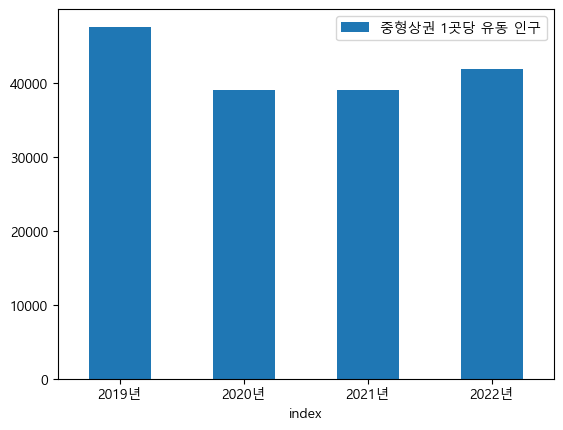

In [408]:
market_count.plot.bar(x='index',y='중형상권 1곳당 유동 인구',rot=0)

### 중형상권이상 1곳당 유동인구는 2020년 낮아졌다가 조금씩 상승하고 있다.

# 이제 상권별 평균속도 데이터를 가져오자

In [409]:
road_2022 = pd.read_csv('./2022_10_자동차_평균속도_위치데이터.csv', encoding='EUC-KR')
road_2022

날짜 주중,주말    도로명         시점명         종점명  방향    거리  출근시간 (06~09)  \
0      2022010    주말  4.19로    국립4.19묘지  국립4.19묘지입구  상행   352         16.61   
1      2022010    주중  4.19로    국립4.19묘지  국립4.19묘지입구  상행   352         15.99   
2      2022010    주말  4.19로    국립4.19묘지     아카데미하우스  하행  1190         46.03   
3      2022010    주중  4.19로    국립4.19묘지     아카데미하우스  하행  1190         46.22   
4      2022010    주말  4.19로  국립4.19묘지입구    국립4.19묘지  하행   354         23.55   
...        ...   ...    ...         ...         ...  ..   ...           ...   
10101  2022010    주중    흑석로         흑석역        한신빌딩  하행   150         14.92   
10102  2022010    주말   희우정로      망원정사거리      한강공원입구  상행   692         25.43   
10103  2022010    주중   희우정로      망원정사거리      한강공원입구  상행   692         24.65   
10104  2022010    주말   희우정로      한강공원입구      망원정사거리  하행   688         20.76   
10105  2022010    주중   희우정로      한강공원입구      망원정사거리  하행   688         19.04   

       퇴근시간 (17~20)  피크 출근시간 (07~08)  피크 퇴근시간 (18~19)  점심시간(11~13)  \
0             13.11            16.72            12.91        14.40   
1             13.06            15.60            12.06        14.39   
2             55.59            41.89            54.67        50.64   
3             55.82            42.06            54.90        50.85   
4             17.16            23.60            17.14        18.66   
...             ...              ...              ...          ...   
10101         10.93            14.02            11.12        12.21   
10102         19.24            24.67            19.40        22.61   
10103         20.71            23.11            20.64        22.18   
10104         17.94            21.28            18.34        18.20   
10105         19.92            18.66            20.15        17.73   

       저녁시간(21~24)  오후시간(14~16)  새벽시간(02~05)       시점 경도      시점 위도  \
0            16.69        11.72        18.23  127.007660  37.648496   
1            16.72        12.79        19.98  127.007660  37.648496   
2            46.76        43.67        60.06  127.007660  37.648496   
3            46.94        43.85        60.31  127.007660  37.648496   
4            21.00        17.06        25.96  127.007660  37.648496   
...            ...          ...          ...         ...        ...   
10101        12.81        10.93        21.44  126.963477  37.509039   
10102        19.70        19.73        27.55  126.904949  37.552063   
10103        20.79        21.36        27.17  126.904949  37.552063   
10104        19.37        17.60        22.17  126.898950  37.556062   
10105        18.68        18.49        22.05  126.898950  37.556062   

            종점 경도      종점 위도  
0      127.007660  37.648496  
1      127.007660  37.648496  
2      127.000299  37.640026  
3      127.000299  37.640026  
4      127.007660  37.648496  
...           ...        ...  
10101  126.944390  37.537843  
10102  126.898950  37.556062  
10103  126.898950  37.556062  
10104  126.904949  37.552063  
10105  126.904949  37.552063  

[10106 rows x 19 columns]

# 주간(시)의 평균 속도를 구하고, 평일을 기준으로 하자
- 출근시간(출근시간 (06~09) 점심시간(11~13)오후시간(14~16) 퇴근시간 (17~20)을 더하고 평균을 내자

In [410]:
road_2022["주간평균속도"] = (road_2022['출근시간 (06~09)'] +  road_2022['퇴근시간 (17~20)'] + \
                            road_2022['점심시간(11~13)'] + road_2022['오후시간(14~16)']) / 4

In [411]:
road_2022[road_2022['주중,주말'].isin(["주중"])]

날짜 주중,주말    도로명           시점명           종점명  방향    거리  \
1      2022010    주중  4.19로      국립4.19묘지    국립4.19묘지입구  상행   352   
3      2022010    주중  4.19로      국립4.19묘지       아카데미하우스  하행  1190   
5      2022010    주중  4.19로    국립4.19묘지입구      국립4.19묘지  하행   354   
7      2022010    주중  4.19로       아카데미하우스      국립4.19묘지  상행  1179   
9      2022010    주중    가락로        방이동고분군          방이초교  하행   845   
...        ...   ...    ...           ...           ...  ..   ...   
10097  2022010    주중    흑석로      흑석2동신한은행  흑석2동신한은행_흑석로  상행    55   
10099  2022010    주중    흑석로  흑석2동신한은행_흑석로          한신빌딩  상행    86   
10101  2022010    주중    흑석로           흑석역          한신빌딩  하행   150   
10103  2022010    주중   희우정로        망원정사거리        한강공원입구  상행   692   
10105  2022010    주중   희우정로        한강공원입구        망원정사거리  하행   688   

       출근시간 (06~09)  퇴근시간 (17~20)  피크 출근시간 (07~08)  피크 퇴근시간 (18~19)  \
1             15.99         13.06            15.60            12.06   
3             46.22         55.82            42.06            54.90   
5             22.19         18.11            21.45            17.98   
7             40.10         38.49            39.12            36.30   
9             21.93         17.39            21.16            16.74   
...             ...           ...              ...              ...   
10097         13.90         12.05            13.76            11.56   
10099         14.03         12.02            13.44            12.17   
10101         14.92         10.93            14.02            11.12   
10103         24.65         20.71            23.11            20.64   
10105         19.04         19.92            18.66            20.15   

       점심시간(11~13)  저녁시간(21~24)  오후시간(14~16)  새벽시간(02~05)       시점 경도  \
1            14.39        16.72        12.79        19.98  127.007660   
3            50.85        46.94        43.85        60.31  127.007660   
5            19.28        21.22        18.37        27.27  127.007660   
7            39.64        43.57        34.41        47.94  127.000299   
9            19.74        19.89        18.97        24.88  127.118445   
...            ...          ...          ...          ...         ...   
10097        12.42        14.47        12.62        20.43  126.960528   
10099        12.56        13.21        11.46        17.76  126.957062   
10101        12.21        12.81        10.93        21.44  126.963477   
10103        22.18        20.79        21.36        27.17  126.904949   
10105        17.73        18.68        18.49        22.05  126.898950   

           시점 위도       종점 경도      종점 위도   주간평균속도  
1      37.648496  127.007660  37.648496  14.0575  
3      37.648496  127.000299  37.640026  49.1850  
5      37.648496  127.007660  37.648496  19.4875  
7      37.640026  127.007660  37.648496  38.1600  
9      37.507454  127.120563  37.513091  19.5075  
...          ...         ...        ...      ...  
10097  37.509485  126.957062  37.506554  12.7475  
10099  37.506554  126.944390  37.537843  12.5175  
10101  37.509039  126.944390  37.537843  12.2475  
10103  37.552063  126.898950  37.556062  22.2250  
10105  37.556062  126.904949  37.552063  18.7950  

[5053 rows x 20 columns]

In [412]:
road_2022 = road_2022[['시점명', '종점명', '방향', '주중,주말', '주간평균속도', '시점 경도', '시점 위도', '종점 경도',  '종점 위도']]
road_2022 = road_2022[road_2022['주중,주말'].isin(["주중"])]
road_2022 = road_2022.reset_index()
road_2022

index           시점명           종점명  방향 주중,주말   주간평균속도       시점 경도  \
0         1      국립4.19묘지    국립4.19묘지입구  상행    주중  14.0575  127.007660   
1         3      국립4.19묘지       아카데미하우스  하행    주중  49.1850  127.007660   
2         5    국립4.19묘지입구      국립4.19묘지  하행    주중  19.4875  127.007660   
3         7       아카데미하우스      국립4.19묘지  상행    주중  38.1600  127.000299   
4         9        방이동고분군          방이초교  하행    주중  19.5075  127.118445   
...     ...           ...           ...  ..   ...      ...         ...   
5048  10097      흑석2동신한은행  흑석2동신한은행_흑석로  상행    주중  12.7475  126.960528   
5049  10099  흑석2동신한은행_흑석로          한신빌딩  상행    주중  12.5175  126.957062   
5050  10101           흑석역          한신빌딩  하행    주중  12.2475  126.963477   
5051  10103        망원정사거리        한강공원입구  상행    주중  22.2250  126.904949   
5052  10105        한강공원입구        망원정사거리  하행    주중  18.7950  126.898950   

          시점 위도       종점 경도      종점 위도  
0     37.648496  127.007660  37.648496  
1     37.648496  127.000299  37.640026  
2     37.648496  127.007660  37.648496  
3     37.640026  127.007660  37.648496  
4     37.507454  127.120563  37.513091  
...         ...         ...        ...  
5048  37.509485  126.957062  37.506554  
5049  37.506554  126.944390  37.537843  
5050  37.509039  126.944390  37.537843  
5051  37.552063  126.898950  37.556062  
5052  37.556062  126.904949  37.552063  

[5053 rows x 10 columns]

- most_big_market_region_2022
- big_market_region_2022
- middle_market_region_2022

In [413]:
import numpy as np
from haversine import haversine
from tqdm import tqdm

In [414]:
most_big_market_region_2022["상권의 도로 평균 속도"] = 0

big_market_region_2022["상권의 도로 평균 속도"] = 0

middle_market_region_2022["상권의 도로 평균 속도"] = 0

In [422]:
most_big_market_region_2022

index                 상권_코드_명  점포_수     분기당_매출_금액  분기당_매출_건수        long  \
0      1  명동 남대문 북창동 다동 무교동 관광특구  8228  414295939101   15035663  126.981856   
1    345                     종각역  2108  129766749443    4925993  126.983496   
2    455           고속터미널(고속터미널역)  1015   99322681540    3617885  127.003981   
3    522         평화시장(통일상가 동화상가)  1958  106968434038    3254288  127.005863   

         lat           유동인구  환승가능한버스노선  500m 버스정류장  환승가능지하철  500m 지하철역   상권규모  \
0  37.564149  111583.354839   9.157895          19      1.5          2  특대형상권   
1  37.570339  100588.774194   7.913043          23      1.0          2  특대형상권   
2  37.505008  100292.580645   3.875000          16      3.0          2  특대형상권   
3  37.568772  103006.274194   6.130435          23      2.0          2  특대형상권   

   상권의 도로 평균 속도  
0             0  
1             0  
2             0  
3             0

In [476]:
my_map_2022 = folium.Map(location=[37.5502, 126.982], zoom_start=12, title="Stamen Toner")

In [477]:
for i in range(len(middle_market_region_2022)):
    road_count = 0
    market_region_location =  (middle_market_region_2022['lat'][i], middle_market_region_2022['long'][i])
    for each in range(len(road_2022)):
        road_location = (road_2022['시점 위도'][each], road_2022['시점 경도'][each])
        a = haversine(road_location, market_region_location, unit = 'm')
        if a < 500:
            road_count = road_count + 1
            middle_market_region_2022['상권의 도로 평균 속도'][i] = middle_market_region_2022['상권의 도로 평균 속도'][i] +\
                                                                            road_2022['주간평균속도'][each]  
     
            if road_2022['방향'][each] == "상행":
                location_data = [[road_2022['시점 위도'][each], road_2022['시점 경도'][each]],
                                 [road_2022['종점 위도'][each], road_2022['종점 경도'][each]]]
                b = haversine([road_2022['시점 위도'][each], road_2022['시점 경도'][each]],
                              [road_2022['종점 위도'][each], road_2022['종점 경도'][each]], unit = 'm')
            
            if road_2022['방향'][each] == "하행":
                location_data = [[float(road_2022['시점 위도'][each])+0.0001, float(road_2022['시점 경도'][each]+0.0006)],
                                 [float(road_2022['종점 위도'][each])+0.0001, float(road_2022['종점 경도'][each])+0.0006]]
                
                b = haversine([float(road_2022['시점 위도'][each])+0.0001, float(road_2022['시점 경도'][each])+0.0006], 
                              [float(road_2022['종점 위도'][each])+0.0001, float(road_2022['종점 경도'][each])+0.0006], unit = 'm')
 
            if b < 5500:      
                if road_2022['주간평균속도'][each] >= 35:
                    folium.PolyLine(locations=location_data, tooltip='Polyline', color='green').add_to(my_map_2022)

                elif road_2022['주간평균속도'][each] > 20:
                    folium.PolyLine(locations=location_data, tooltip='Polyline', color="yellow").add_to(my_map_2022)

                else:
                    folium.PolyLine(locations=location_data, tooltip='Polyline', color='red').add_to(my_map_2022)

    
        
        road_location = (road_2022['종점 위도'][each], road_2022['종점 경도'][each])
        a = haversine(road_location, market_region_location, unit = 'm')
        if a < 500:
            road_count = road_count + 1
            middle_market_region_2022['상권의 도로 평균 속도'][i] = middle_market_region_2022['상권의 도로 평균 속도'][i] +\
                                                                            road_2022['주간평균속도'][each] 
            
            if road_2022['방향'][each] == "상행":
                location_data = [[road_2022['시점 위도'][each], road_2022['시점 경도'][each]],
                                 [road_2022['종점 위도'][each], road_2022['종점 경도'][each]]]
                b = haversine([road_2022['시점 위도'][each], road_2022['시점 경도'][each]],
                              [road_2022['종점 위도'][each], road_2022['종점 경도'][each]], unit = 'm')
            
            if road_2022['방향'][each] == "하행":
                location_data = [[float(road_2022['시점 위도'][each])+0.0001, float(road_2022['시점 경도'][each]+0.0006)],
                                 [float(road_2022['종점 위도'][each])+0.0001, float(road_2022['종점 경도'][each])+0.0006]]
                
                b = haversine([float(road_2022['시점 위도'][each])+0.0001, float(road_2022['시점 경도'][each])+0.0006], 
                              [float(road_2022['종점 위도'][each])+0.0001, float(road_2022['종점 경도'][each])+0.0006], unit = 'm')
            
            if b < 5500:   
                if road_2022['주간평균속도'][each] >= 35:
                    folium.PolyLine(locations=location_data, tooltip='Polyline', color='green').add_to(my_map_2022)

                elif road_2022['주간평균속도'][each] > 20:
                    folium.PolyLine(locations=location_data, tooltip='Polyline', color="yellow").add_to(my_map_2022)

                else:
                    folium.PolyLine(locations=location_data, tooltip='Polyline', color='red').add_to(my_map_2022)
                
    
        
    middle_market_region_2022["상권의 도로 평균 속도"][i] = middle_market_region_2022['상권의 도로 평균 속도'][i] / road_count

In [478]:
for i in range(len(big_market_region_2022)):
    road_count = 0
    market_region_location =  (big_market_region_2022['lat'][i], big_market_region_2022['long'][i])
    for each in range(len(road_2022)):
        road_location = (road_2022['시점 위도'][each], road_2022['시점 경도'][each])
        a = haversine(road_location, market_region_location, unit = 'm')
        if a < 500:
            road_count = road_count + 1
            big_market_region_2022['상권의 도로 평균 속도'][i] = big_market_region_2022['상권의 도로 평균 속도'][i] +\
                                                                            road_2022['주간평균속도'][each]  
     
            if road_2022['방향'][each] == "상행":
                location_data = [[road_2022['시점 위도'][each], road_2022['시점 경도'][each]],
                                 [road_2022['종점 위도'][each], road_2022['종점 경도'][each]]]
                b = haversine([road_2022['시점 위도'][each], road_2022['시점 경도'][each]],
                              [road_2022['종점 위도'][each], road_2022['종점 경도'][each]], unit = 'm')
            
            if road_2022['방향'][each] == "하행":
                location_data = [[float(road_2022['시점 위도'][each])+0.0001, float(road_2022['시점 경도'][each]+0.0006)],
                                 [float(road_2022['종점 위도'][each])+0.0001, float(road_2022['종점 경도'][each])+0.0006]]
                
                b = haversine([float(road_2022['시점 위도'][each])+0.0001, float(road_2022['시점 경도'][each])+0.0006], 
                              [float(road_2022['종점 위도'][each])+0.0001, float(road_2022['종점 경도'][each])+0.0006], unit = 'm')
            
            if b < 5500:      
                if road_2022['주간평균속도'][each] >= 35:
                    folium.PolyLine(locations=location_data, tooltip='Polyline', color='green').add_to(my_map_2022)

                elif road_2022['주간평균속도'][each] > 20:
                    folium.PolyLine(locations=location_data, tooltip='Polyline', color="yellow").add_to(my_map_2022)

                else:
                    folium.PolyLine(locations=location_data, tooltip='Polyline', color='red').add_to(my_map_2022)

    
        
        road_location = (road_2022['종점 위도'][each], road_2022['종점 경도'][each])
        a = haversine(road_location, market_region_location, unit = 'm')
        if a < 500:
            road_count = road_count + 1
            big_market_region_2022['상권의 도로 평균 속도'][i] = big_market_region_2022['상권의 도로 평균 속도'][i] +\
                                                                            road_2022['주간평균속도'][each] 
            
            if road_2022['방향'][each] == "상행":
                location_data = [[road_2022['시점 위도'][each], road_2022['시점 경도'][each]],
                                 [road_2022['종점 위도'][each], road_2022['종점 경도'][each]]]
                
                b = haversine([road_2022['시점 위도'][each], road_2022['시점 경도'][each]],
                              [road_2022['종점 위도'][each], road_2022['종점 경도'][each]], unit = 'm')
            
            if road_2022['방향'][each] == "하행":
                location_data = [[float(road_2022['시점 위도'][each])+0.0001, float(road_2022['시점 경도'][each]+0.0006)],
                                 [float(road_2022['종점 위도'][each])+0.0001, float(road_2022['종점 경도'][each])+0.0006]]
                
                b = haversine([float(road_2022['시점 위도'][each])+0.0001, float(road_2022['시점 경도'][each])+0.0006], 
                              [float(road_2022['종점 위도'][each])+0.0001, float(road_2022['종점 경도'][each])+0.0006], unit = 'm')
            
            if b < 5500:   
                if road_2022['주간평균속도'][each] >= 35:
                    folium.PolyLine(locations=location_data, tooltip='Polyline', color='green').add_to(my_map_2022)

                elif road_2022['주간평균속도'][each] > 20:
                    folium.PolyLine(locations=location_data, tooltip='Polyline', color="yellow").add_to(my_map_2022)

                else:
                    folium.PolyLine(locations=location_data, tooltip='Polyline', color='red').add_to(my_map_2022)
                
    
        
    big_market_region_2022["상권의 도로 평균 속도"][i] =  big_market_region_2022['상권의 도로 평균 속도'][i] / road_count
    
            

In [479]:
for i in range(len(most_big_market_region_2022)):
    road_count = 0
    market_region_location =  (most_big_market_region_2022['lat'][i], most_big_market_region_2022['long'][i])
    for each in range(len(road_2022)):
        road_location = (road_2022['시점 위도'][each], road_2022['시점 경도'][each])
        a = haversine(road_location, market_region_location, unit = 'm')
        if a < 500:
            road_count = road_count + 1
            most_big_market_region_2022['상권의 도로 평균 속도'][i] = most_big_market_region_2022['상권의 도로 평균 속도'][i] +\
                                                                            road_2022['주간평균속도'][each]  
     
            if road_2022['방향'][each] == "상행":
                location_data = [[road_2022['시점 위도'][each], road_2022['시점 경도'][each]],
                                 [road_2022['종점 위도'][each], road_2022['종점 경도'][each]]]
                b = haversine([road_2022['시점 위도'][each], road_2022['시점 경도'][each]],
                              [road_2022['종점 위도'][each], road_2022['종점 경도'][each]], unit = 'm')
            
            if road_2022['방향'][each] == "하행":
                location_data = [[float(road_2022['시점 위도'][each])+0.0001, float(road_2022['시점 경도'][each])+0.0006],
                                 [float(road_2022['종점 위도'][each])+0.0001, float(road_2022['종점 경도'][each])+0.0006]]
                
                b = haversine([float(road_2022['시점 위도'][each])+0.0001, float(road_2022['시점 경도'][each])+0.0006], 
                              [float(road_2022['종점 위도'][each])+0.0001, float(road_2022['종점 경도'][each])+0.0006], unit = 'm')
                
            if b <5500:
                if road_2022['주간평균속도'][each] >= 35:
                    folium.PolyLine(locations=location_data, tooltip='Polyline', color='green').add_to(my_map_2022)
        
                elif road_2022['주간평균속도'][each] > 20:
                    folium.PolyLine(locations=location_data, tooltip='Polyline', color="yellow").add_to(my_map_2022)
            
                else:
                    folium.PolyLine(locations=location_data, tooltip='Polyline', color='red').add_to(my_map_2022)
                
    
        
        road_location = (road_2022['종점 위도'][each], road_2022['종점 경도'][each])
        a = haversine(road_location, market_region_location, unit = 'm')
        if a < 500:
            road_count = road_count + 1
            most_big_market_region_2022['상권의 도로 평균 속도'][i] = most_big_market_region_2022['상권의 도로 평균 속도'][i] +\
                                                                            road_2022['주간평균속도'][each] 
            
            if road_2022['방향'][each] == "상행":
                location_data = [[road_2022['시점 위도'][each], road_2022['시점 경도'][each]],
                                 [road_2022['종점 위도'][each], road_2022['종점 경도'][each]]]
                
                b = haversine([road_2022['시점 위도'][each], road_2022['시점 경도'][each]],
                              [road_2022['종점 위도'][each], road_2022['종점 경도'][each]], unit = 'm')
            
            if road_2022['방향'][each] == "하행":
                location_data = [[float(road_2022['시점 위도'][each])+0.0001, float(road_2022['시점 경도'][each])+0.0006],
                                 [float(road_2022['종점 위도'][each])+0.0001, float(road_2022['종점 경도'][each])+0.0006]]
                
                b = haversine([float(road_2022['시점 위도'][each])+0.0001, float(road_2022['시점 경도'][each])+0.0006], 
                              [float(road_2022['종점 위도'][each])+0.0001, float(road_2022['종점 경도'][each])+0.0006], unit = 'm')
            
            
            if b < 5500:
                if road_2022['주간평균속도'][each] >= 35:
                    folium.PolyLine(locations=location_data, tooltip='Polyline', color='green').add_to(my_map_2022)
        
                elif road_2022['주간평균속도'][each] > 20:
                    folium.PolyLine(locations=location_data, tooltip='Polyline', color="yellow").add_to(my_map_2022)

                else:
                    folium.PolyLine(locations=location_data, tooltip='Polyline', color='red').add_to(my_map_2022)
                
    
        
    most_big_market_region_2022["상권의 도로 평균 속도"][i] =  most_big_market_region_2022['상권의 도로 평균 속도'][i] / road_count

In [480]:
for each in range(len(middle_market_region_2022)):
    marker_circle = folium.Circle([middle_market_region_2022['lat'][each], middle_market_region_2022['long'][each]],
                                       radius = 500,
                                        color = 'white',
                                        popup = middle_market_region_2022['상권_코드_명'][each],
                                        fill_color = 'white'
                                       )
    marker_circle.add_to(my_map_2022)
    
for each in range(len(big_market_region_2022)):
    marker_circle = folium.Circle([big_market_region_2022['lat'][each], big_market_region_2022['long'][each]],
                                       radius = 500,
                                        color = 'orange',
                                        popup = big_market_region_2022['상권_코드_명'][each],
                                        fill_color = 'orange'
                                       )
    marker_circle.add_to(my_map_2022)

for each in range(len(most_big_market_region_2022)):
    marker_circle = folium.Circle([most_big_market_region_2022['lat'][each], most_big_market_region_2022['long'][each]],
                                       radius = 500,
                                        color = 'red',
                                        popup = most_big_market_region_2022['상권_코드_명'][each],
                                        fill_color = 'red'
                                       )
    marker_circle.add_to(my_map_2022)

In [481]:
my_map_2022